<a href="https://www.kaggle.com/code/faizahmadnadhif/mobile-sales?scriptVersionId=190143165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

/kaggle/input/mobile-sales-dataset/mobile_sales.csv


In [100]:
import pandas as pd
df = pd.read_csv('/kaggle/input/mobile-sales-dataset/mobile_sales.csv')

In [101]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online


In [98]:
column_names = df.columns

In [38]:
columns_df = pd.DataFrame(column_names, columns=["Column Names"])

In [99]:
columns_df

,Column Names
0,MobileModel
1,Brand
2,Price
3,UnitsSold
4,TotalRevenue
5,CustomerAge
6,CustomerGender
7,PaymentMethod


In [52]:
print("Missing Value: ")
df.isnull().sum()

Missing Value: 


TransactionID     0
Date              0
MobileModel       0
Brand             0
Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
CustomerGender    0
Location          0
PaymentMethod     0
dtype: int64

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
print("Duplicated Values: ")
df.duplicated().sum()

Duplicated Values: 


0

In [56]:
print("Dataset Information: ")
df.info()

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   1000 non-null   object 
 1   Date            1000 non-null   object 
 2   MobileModel     1000 non-null   object 
 3   Brand           1000 non-null   object 
 4   Price           1000 non-null   float64
 5   UnitsSold       1000 non-null   int64  
 6   TotalRevenue    1000 non-null   float64
 7   CustomerAge     1000 non-null   int64  
 8   CustomerGender  1000 non-null   object 
 9   Location        1000 non-null   object 
 10  PaymentMethod   1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


In [57]:
print("Statistic: ")
df.describe()

Statistic: 


,Price,UnitsSold,TotalRevenue,CustomerAge
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,807.512970,50.074000,40218.445040,41.141000
std,402.489878,28.616804,32715.290358,13.528346
min,103.320000,1.000000,116.850000,18.000000
25%,458.037500,25.000000,13316.037500,29.000000
50%,823.730000,51.000000,30860.655000,41.000000
75%,1157.875000,75.000000,60770.435000,53.000000
max,1499.250000,99.000000,141411.840000,64.000000


In [97]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())

Unique values in TransactionID:
['79397f68-61ed-4ea8-bcb2-f918d4e6c05b'
 '4f87d114-f522-4ead-93e3-f336402df6aa'
 '6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1'
 '7da7de95-f772-4cc2-bce0-b0873f98233e'
 '469044af-0d60-4d87-af66-c6603e844057'
 'f7e98db9-cb87-453e-8179-e48ba5443932'
 '61f1c03f-5527-49bf-88f6-0d8694e72d41'
 '55d74ccb-e3c0-4ceb-a102-6d553736b944'
 '889bd479-e06a-494d-baae-e099bea5469c'
 '567c276b-fec4-47e4-b5be-71f2b79bd745'
 'f7d25e75-e7e6-4b61-8879-63121787a1dd'
 'c28cafd9-08a6-4a72-8a89-b05d82993315'
 '1a9dfe22-c8d8-4872-8cb3-1e7d37c492a9'
 '740bd70e-8837-4f7f-8621-45d98a0788ea'
 '72122aaf-4049-4799-9c5e-56fa0bda637a'
 '41e73345-7161-4b86-9922-848a9ca80bf9'
 '21c8f1ad-417b-46a8-8bec-ccfe5d9b18f9'
 'f0e76c4a-2a03-4c2d-821c-114e2877fa0d'
 'a1dae876-8ee4-4d2e-ac91-35d2536426cf'
 '5a907002-ba75-4125-879a-217705dd56fd'
 '01ba7cfd-dc66-4825-9d40-3575f752c1cc'
 'e2b513d1-e3c2-4592-b59e-735b9c1fc2c1'
 '0e6b5315-5a90-4d0c-a4db-4b05d041c7e6'
 'bba8307d-a14f-4411-a2b1-7691e9102fa7'
 '8dfb7c

In [70]:
df['MobileModel'].value_counts()

MobileModel
many       5
service    5
eat        4
believe    4
mouth      4
          ..
see        1
listen     1
policy     1
change     1
memory     1
Name: count, Length: 637, dtype: int64

In [71]:
df['Brand'].value_counts()

Brand
Martinez Ltd                   3
Sanchez PLC                    3
Ramos and Sons                 2
Williams Group                 2
Miller and Sons                2
                              ..
Jackson, Collier and Barber    1
Perez and Sons                 1
Ayers and Sons                 1
Holland PLC                    1
Kim, Maxwell and Moore         1
Name: count, Length: 980, dtype: int64

<Axes: >

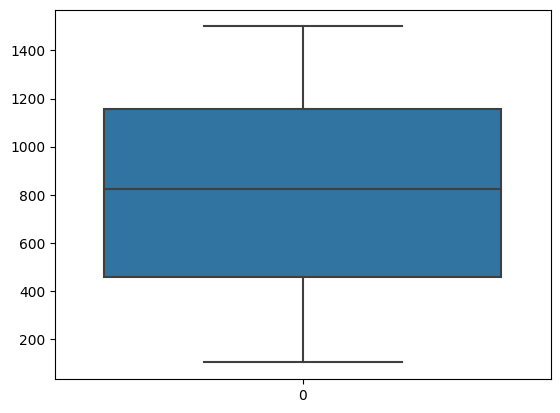

In [72]:
sns.boxplot(df['Price']) 

<Axes: >

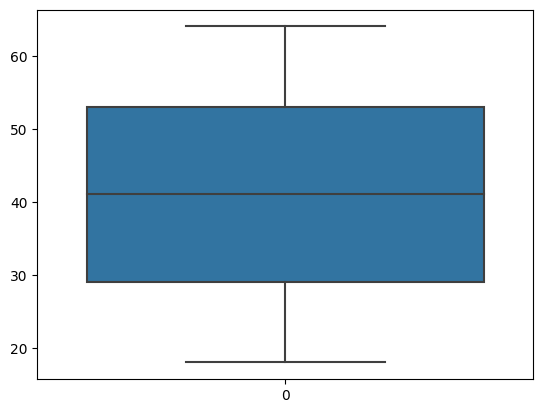

In [73]:
sns.boxplot(df['CustomerAge'])

<Axes: >

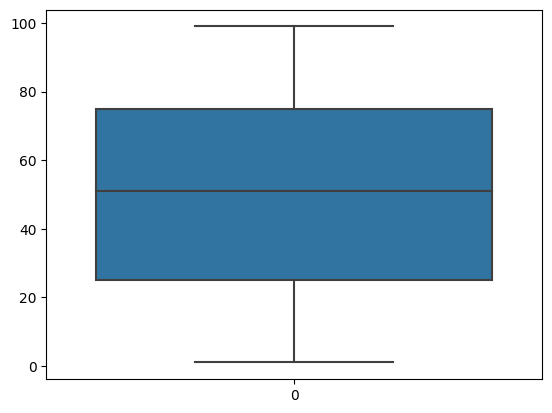

In [74]:
sns.boxplot(df['UnitsSold'])

<Axes: >

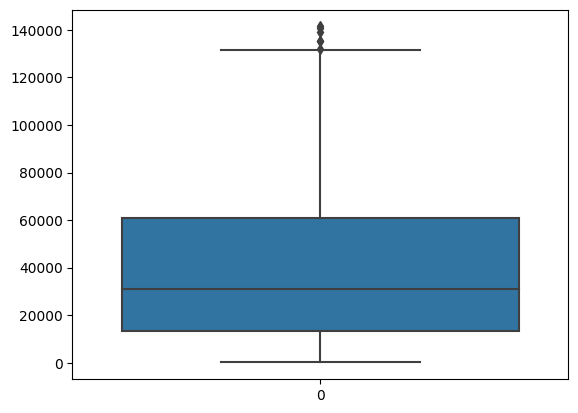

In [75]:
sns.boxplot(df['TotalRevenue'])

<Axes: xlabel='CustomerGender'>

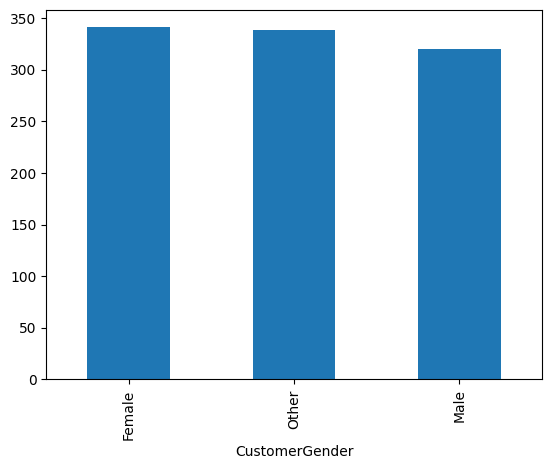

In [76]:
df['CustomerGender'].value_counts().plot(kind = 'bar')

<Axes: >

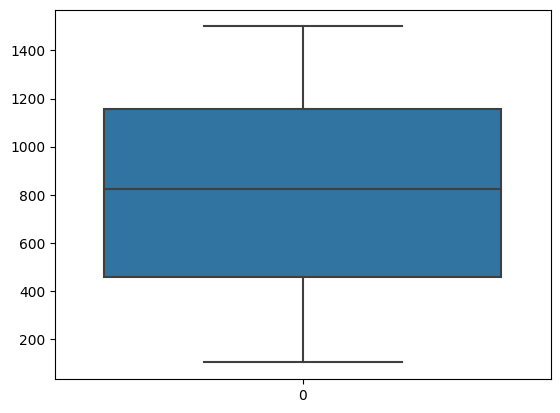

In [81]:
sns.boxplot(df['Price'])

In [78]:
df.head(2)

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card


In [79]:
df['PaymentMethod'].value_counts()

PaymentMethod
Credit Card    278
Online         259
Debit Card     246
Cash           217
Name: count, dtype: int64

In [95]:
# Encode the target variable
label_encoder = LabelEncoder()
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])

# Split the data into training and test sets
X = df.drop(columns=['PaymentMethod'])
y = df['PaymentMethod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = ['Brand', 'CustomerGender']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Decode the predictions back to the original labels if needed
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print decoded classification report
print("Decoded Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.25      0.63      0.35        78
           2       0.23      0.26      0.24        80
           3       0.33      0.03      0.05        77

    accuracy                           0.24       300
   macro avg       0.20      0.23      0.16       300
weighted avg       0.21      0.24      0.17       300

Decoded Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.25      0.63      0.35        78
           2       0.23      0.26      0.24        80
           3       0.33      0.03      0.05        77

    accuracy                           0.24       300
   macro avg       0.20      0.23      0.16       300
weighted avg       0.21      0.24      0.17       300

